In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('bikebuyer1.csv')

In [3]:
dataset

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,25410.0,NaN,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,22820.0,Married,Male,100000,4.0,High School,Professional,Yes,3,1.0,Europe,52,No
6993,22821.0,Married,Female,130000,4.0,Partial College,Professional,Yes,4,2.0,Europe,52,No
6994,22823.0,Married,Female,160000,5.0,Bachelors,Management,Yes,2,1.0,Europe,53,No
6995,22825.0,Single,Female,120000,5.0,Partial College,Professional,Yes,3,1.0,Europe,54,No


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6997 entries, 0 to 6996
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6996 non-null   float64
 1   Marital Status    6981 non-null   object 
 2   Gender            6968 non-null   object 
 3   Yearly Income     6997 non-null   int64  
 4   Children          6979 non-null   float64
 5   Education         6997 non-null   object 
 6   Occupation        6997 non-null   object 
 7   Home Owner        6997 non-null   object 
 8   Cars              6997 non-null   int64  
 9   Commute Distance  6968 non-null   float64
 10  Region            6997 non-null   object 
 11  Age               6997 non-null   int64  
 12  Bike Buyer        6997 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 710.8+ KB


In [5]:
dataset.isnull().any()
dataset.isnull().sum()

ID                   1
Marital Status      16
Gender              29
Yearly Income        0
Children            18
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

In [6]:
dataset['Marital Status'].unique()

array(['Single', 'Married', nan], dtype=object)

In [7]:
p=dataset['Marital Status'].value_counts()

In [8]:
p[0]

4133

In [9]:
dataset['Gender'].value_counts()

Male      3527
Female    3441
Name: Gender, dtype: int64

In [10]:
dataset['Marital Status'].fillna(dataset['Marital Status'].mode()[0],inplace=True)
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset['Children'].fillna(dataset['Children'].median(),inplace=True)
dataset['Commute Distance'].fillna(dataset['Commute Distance'].median(),inplace=True)

In [11]:
dataset.isnull().any()

ID                   True
Marital Status      False
Gender              False
Yearly Income       False
Children            False
Education           False
Occupation          False
Home Owner          False
Cars                False
Commute Distance    False
Region              False
Age                 False
Bike Buyer          False
dtype: bool

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
dataset['Marital Status']=le.fit_transform(dataset['Marital Status'])
dataset['Gender']=le.fit_transform(dataset['Gender'])
dataset['Education']=le.fit_transform(dataset['Education'])
dataset['Occupation']=le.fit_transform(dataset['Occupation'])
dataset['Home Owner']=le.fit_transform(dataset['Home Owner'])
dataset['Region']=le.fit_transform(dataset['Region'])
dataset['Bike Buyer']=le.fit_transform(dataset['Bike Buyer'])

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6997 entries, 0 to 6996
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6996 non-null   float64
 1   Marital Status    6997 non-null   int32  
 2   Gender            6997 non-null   int32  
 3   Yearly Income     6997 non-null   int64  
 4   Children          6997 non-null   float64
 5   Education         6997 non-null   int32  
 6   Occupation        6997 non-null   int32  
 7   Home Owner        6997 non-null   int32  
 8   Cars              6997 non-null   int64  
 9   Commute Distance  6997 non-null   float64
 10  Region            6997 non-null   int32  
 11  Age               6997 non-null   int64  
 12  Bike Buyer        6997 non-null   int32  
dtypes: float64(3), int32(7), int64(3)
memory usage: 519.4 KB


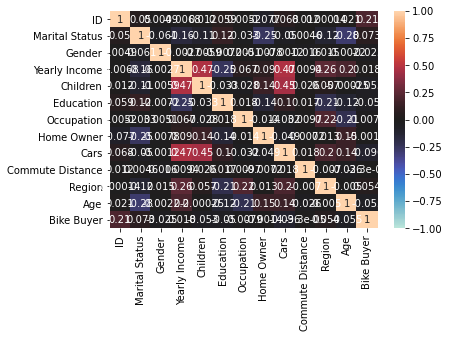

In [15]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True,vmin=-1,vmax=1,center=0)

In [16]:
dataset.drop(['ID','Education'],axis=1,inplace=True)

In [17]:
dataset.shape

(6997, 11)

In [18]:
dataset['Occupation'].value_counts()

3    2031
4    1748
1    1265
2     990
0     963
Name: Occupation, dtype: int64

In [19]:
dataset['Region'].value_counts()

1    3728
0    2096
2    1173
Name: Region, dtype: int64

In [20]:
dataset['Gender'].value_counts()

1    3556
0    3441
Name: Gender, dtype: int64

In [21]:
dataset.head(1)

,Marital Status,Gender,Yearly Income,Children,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,1,1,30000,0.0,0,0,1,1.0,0,33,1


In [23]:
x = dataset.iloc[:,[0,4,5,7]].head(2)
x

,Marital Status,Occupation,Home Owner,Commute Distance
0,1,0,0,1.0
1,0,0,1,1.0


In [22]:
#input
x = dataset.iloc[:,0:10].values
x

array([[1.0e+00, 1.0e+00, 3.0e+04, ..., 1.0e+00, 0.0e+00, 3.3e+01],
       [0.0e+00, 0.0e+00, 4.0e+04, ..., 1.0e+00, 0.0e+00, 3.7e+01],
       [0.0e+00, 1.0e+00, 1.6e+05, ..., 2.0e+00, 0.0e+00, 5.5e+01],
       ...,
       [0.0e+00, 0.0e+00, 1.6e+05, ..., 1.0e+00, 0.0e+00, 5.3e+01],
       [1.0e+00, 0.0e+00, 1.2e+05, ..., 1.0e+00, 0.0e+00, 5.4e+01],
       [0.0e+00, 1.0e+00, 1.3e+05, ..., 2.0e+00, 0.0e+00, 5.4e+01]])

In [23]:
#target
y=dataset.iloc[:,-1:].values
y

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [24]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()

In [25]:
z=oh.fit_transform(x[:,4:5]).toarray()
t=oh.fit_transform(x[:,8:9]).toarray()

In [26]:
z

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [27]:
t

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [28]:
x=np.delete(x,[4,8],axis=1)

In [29]:
x.shape

(6997, 8)

In [30]:
#region,occupation
x=np.concatenate((t,z,x),axis=1)

In [31]:
x.shape

(6997, 16)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
x_train.shape

(5597, 16)

In [34]:
x_test.shape

(1400, 16)

In [35]:
y_train.shape

(5597, 1)

In [36]:
y_test.shape

(1400, 1)

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [38]:
x_train.shape

(5597, 16)

In [39]:
#model building libraries
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [102]:
classifier = Sequential()

In [103]:
#input layer
classifier.add(Dense(units=16, kernel_initializer='he_uniform',activation='relu'))

In [104]:
#hidden layer
classifier.add(Dense(units=32, kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=25, kernel_initializer='glorot_uniform',activation='relu'))

In [116]:
#output layer
classifier.add(Dense(units=1,kernel_initializer='he_uniform',activation='tanh'))

In [117]:
classifier.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [118]:
classifier.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
175/175 [==============================] - 1s 2ms/step - loss: 2.2122 - accuracy: 0.8566
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 2.1921 - accuracy: 0.8579
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 2.2644 - accuracy: 0.8532
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 2.2216 - accuracy: 0.8560
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 2.3689 - accuracy: 0.8464
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 2.2761 - accuracy: 0.8524
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 2.3120 - accuracy: 0.8501
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 2.1966 - accuracy: 0.8576
Epoch 9/100
175/175 [==============================] - 0s 2ms/step - loss: 2.1597 - accuracy: 0.8600
Epoch 10/100
175/175 [==============================] - 0s 2ms/step - loss: 2.1696 - accura

175/175 [==============================] - 0s 2ms/step - loss: 2.3425 - accuracy: 0.8481
Epoch 82/100
175/175 [==============================] - 0s 2ms/step - loss: 2.1438 - accuracy: 0.8610
Epoch 83/100
175/175 [==============================] - 0s 2ms/step - loss: 2.1825 - accuracy: 0.8585
Epoch 84/100
175/175 [==============================] - 0s 2ms/step - loss: 2.3399 - accuracy: 0.8483
Epoch 85/100
175/175 [==============================] - 0s 2ms/step - loss: 2.2581 - accuracy: 0.8536
Epoch 86/100
175/175 [==============================] - 0s 2ms/step - loss: 2.1169 - accuracy: 0.8628
Epoch 87/100
175/175 [==============================] - 0s 2ms/step - loss: 2.1879 - accuracy: 0.8582
Epoch 88/100
175/175 [==============================] - 0s 2ms/step - loss: 2.3380 - accuracy: 0.8484
Epoch 89/100
175/175 [==============================] - 0s 2ms/step - loss: 2.0604 - accuracy: 0.8664
Epoch 90/100
175/175 [==============================] - 0s 2ms/step - loss: 2.1755 - accuracy: 

In [119]:
y_pred = classifier.predict(x_test)

In [120]:
y_pred

array([[-0.13906837],
       [-0.47034356],
       [-0.22224683],
       ...,
       [-0.03019888],
       [-0.6563892 ],
       [-0.21040112]], dtype=float32)

In [121]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred.astype('int'))

0.86

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred.astype('int'))

array([[1204,    0],
       [ 196,    0]], dtype=int64)

In [124]:
y_p=classifier.predict(sc.transform([[1., 0., 0.,1., 0., 0., 0., 0.,1,1,145857,0,0,1,0,33]]))

In [114]:
#y_p>0.5 which yes, True
#y_p<0.5 which no, Flase

y_p=y_p>0.5

In [115]:
y_p

array([[False]])